In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import seaborn as sns

%matplotlib inline


In [173]:
df = pd.read_csv("/Users/julkakubisa/Documents/PRACA MAGISTERSKA/spaced_repetition_algorithms/data/13 million Duolingo student learning traces.csv")

In [19]:
""" 
p_recall - session_correct/session_seen
timestamp - UNIX timestamp of the current lesson
delta - time (in seconds) since the last lesson that included this word
user_id - student user ID
learning_language - language being learned
ui_language - user interface language (presumably native to the student)
lexeme_id - system ID for the lexeme tag (i.e., word)
lexeme_string - lexeme tag for word
history_seen - total times user has seen the word prior to this lesson
history_correct - total times user has been correct for the word prior to this lesson
session_seen - times the user saw the word during this lesson
session_correct - times the user got the word correct during this lesson
"""
df

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.00000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.50000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.00000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.50000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.00000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.80000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,5,4
12854222,0.80000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,5,4
12854223,1.00000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,4,4
12854224,0.60000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,5,3


In [262]:
# Check the types
df.dtypes

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
lang                  object
dtype: object

In [ ]:
# df.drop(columns=['timestamp'])
df_numeric = df.select_dtypes(np.number)
features = df_numeric.columns.tolist()


In [253]:
# Check for na
df.isna().any()

p_recall             False
timestamp            False
delta                False
user_id              False
learning_language    False
ui_language          False
lexeme_id            False
lexeme_string        False
history_seen         False
history_correct      False
session_seen         False
session_correct      False
lang                 False
dtype: bool

In [176]:
# Create new column ui language - learning language 
df['lang'] = df['learning_language'] + '-' + df['ui_language']

In [ ]:
# Describe numerical columns 
df.describe().map(lambda x: f"{x:0.3f}")

"""
p_recall (proportion of correct answers to total answers in one session): the mean is 0.9, the median is 1. More than 75% users can answer all questions correctly in one session. 
delta: the mean is 8.5 days between sessions, the median is 0.9 day. Max value is 466 days, 75% users have less than 5.12 days between sessions. Likely outliers. 
history_seen: median is 6 times seen prior to this session, the max is very high (13 518)
history_correct: mean is 6 times correct, standard deviation is very high. 
session_seen: usually around 1 time seen during session, mean 1.8. 
session_correct: mean 1.6, median 1.0 
"""

In [278]:
# Describe by language
for column in features:
    print('Stats for:', column)
    print(df.groupby('learning_language')[column].describe())
    


Stats for: p_recall
                          count    mean     std     min     25%     50%  \
learning_language                                                         
de                1264664.00000 0.96928 0.11034 0.20000 1.00000 1.00000   
en                4423047.00000 0.96467 0.11843 0.20000 1.00000 1.00000   
es                3033595.00000 0.96692 0.11380 0.20000 1.00000 1.00000   
fr                1640352.00000 0.95920 0.12655 0.20000 1.00000 1.00000   
it                 726626.00000 0.97174 0.10553 0.20000 1.00000 1.00000   
pt                 281296.00000 0.97209 0.10597 0.20000 1.00000 1.00000   

                      75%     max  
learning_language                  
de                1.00000 1.00000  
en                1.00000 1.00000  
es                1.00000 1.00000  
fr                1.00000 1.00000  
it                1.00000 1.00000  
pt                1.00000 1.00000  
Stats for: timestamp
                          count             mean          std  \
learn

In [190]:
# Describe categorical columns
df.describe(include=['O'])

,user_id,learning_language,ui_language,lexeme_id,lexeme_string,lang
count,12854226,12854226,12854226,12854226,12854226,12854226
unique,115222,6,4,19279,18781,8
top,u:bcH_,en,en,827a8ecb89f9b59ac5c29b620a5d3ed6,a/a<det><ind><sg>,en-es
freq,19194,5014791,7839435,123099,123099,3641179


In [200]:
# Are there duplicates
df.duplicated().any()

np.False_

In [209]:
# Numeric analysis -> outliers
stats.zscore(df_numeric)
threshold_z = 3
z = np.abs(stats.zscore(df_numeric))
df = df[(z < threshold_z).all(axis=1)]
print("Original DataFrame Shape:", df_numeric.shape[0])
print("DataFrame Shape after Removing Outliers:", df.shape[0])
print('Rows removed', df_numeric.shape[0]- df.shape[0])


# Delete also individually for columns
# outlier_indices = np.where(z > threshold_z)[0]
# no_outliers = df_diabetics.drop(outlier_indices)



Original DataFrame Shape: 12854145
DataFrame Shape after Removing Outliers: 11369580
Rows removed 1484565


In [155]:
# langs_sizes = df.groupby(["ui_language", "learning_language"]).size().to_frame('count')
# langs_sizes['% obs'] = (langs_sizes['count']/langs_sizes['count'].sum())*100
# langs_sizes

langs_sizes = df.groupby(['lang']).size().to_frame('count')
langs_sizes['% obs'] = (langs_sizes['count']/langs_sizes['count'].sum())*100
langs_sizes

target_langs = df.groupby(['learning_language']).size().to_frame('count')
target_langs['% obs'] = (target_langs['count']/target_langs['count'].sum())*100
target_langs

,count,% obs
learning_language,,
de,1452597,11.30054
en,5014791,39.01278
es,3407689,26.51026
fr,1873734,14.57679
it,793935,6.17645
pt,311480,2.42317


In [71]:
sessions_size = df.groupby(["session_correct", "session_seen"]).size().to_frame('count')
sessions_size

count
session_correct session_seen        
0               1             879266
                2              25692
                3               1251
                4                103
                5                 21
...                              ...
18              19                92
                20                37
19              19               101
                20                61
20              20                38

[137 rows x 1 columns]

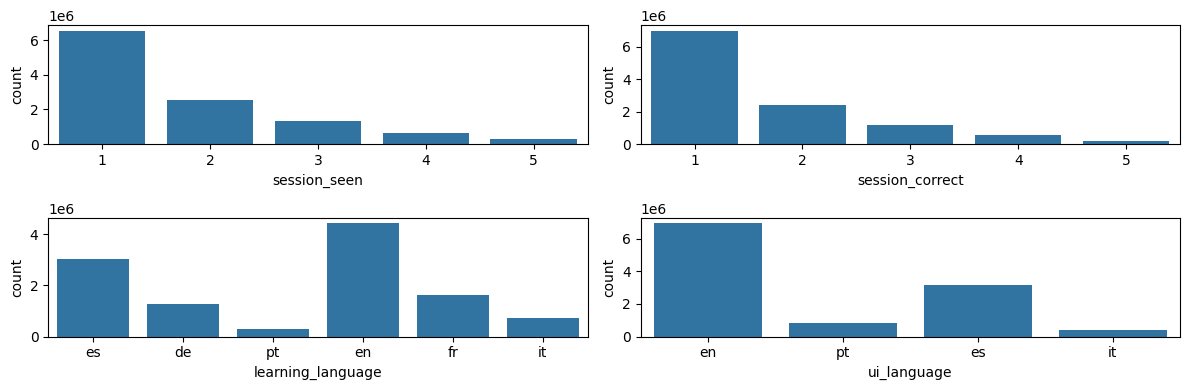

In [308]:
# For ints and objects! 
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
sns.countplot(x='session_seen', data=df, ax=axes[0,0])
sns.countplot(x='session_correct', data=df, ax=axes[0,1])
sns.countplot(x='learning_language', data=df, ax=axes[1,0])
sns.countplot(x='ui_language', data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()

# sns.countplot(x='lang', data=df)


In [281]:
features.remove('timestamp')

In [284]:
features

['p_recall',
 'delta',
 'history_seen',
 'history_correct',
 'session_seen',
 'session_correct']

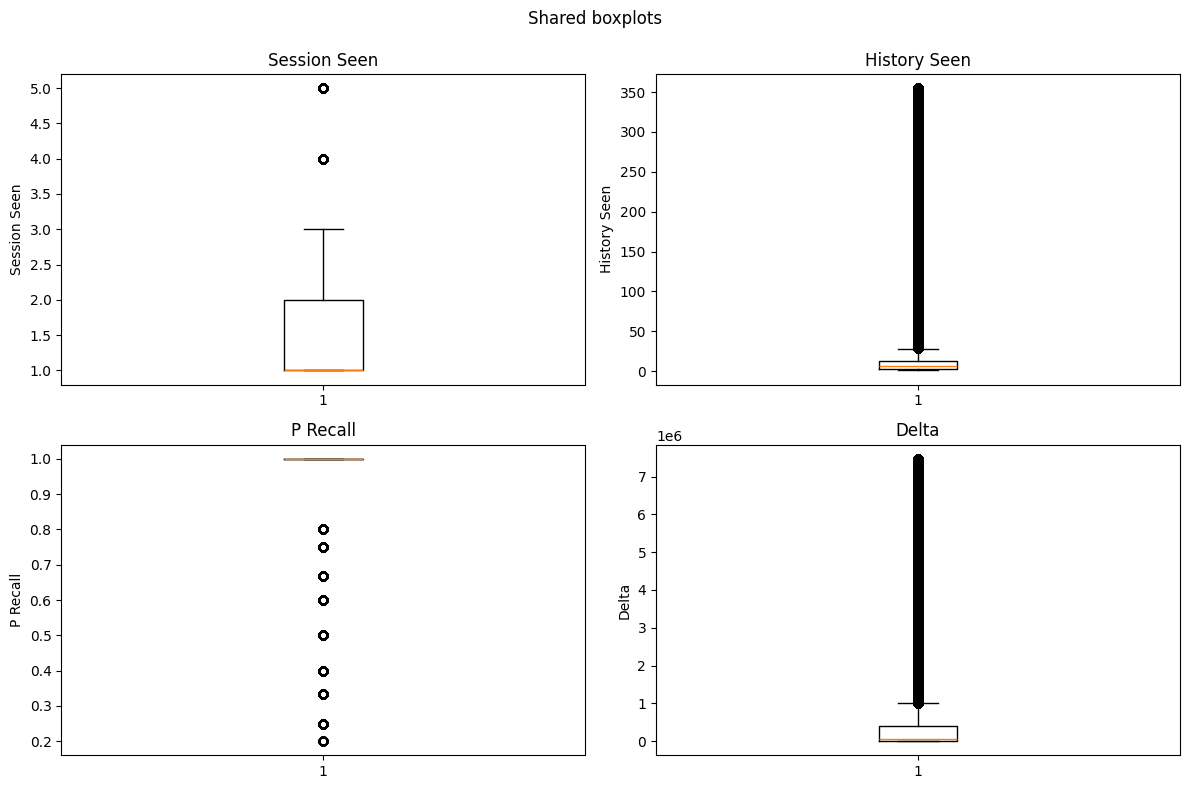

In [294]:
# Boxplots 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each boxplot on the correct subplot
axs[0,0].boxplot(df['session_seen'])
axs[0, 0].set_title('Session Seen')

axs[0,1].boxplot(df['history_correct'])
axs[0, 1].set_title('history_correct')

axs[1,0].boxplot(df['p_recall'])
axs[1, 0].set_title('P Recall')

axs[1,1].boxplot(df['delta'])
axs[1, 1].set_title('Delta')

fig.suptitle('Shared boxplots')
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # Adjust the top to make room for the super title

plt.show()

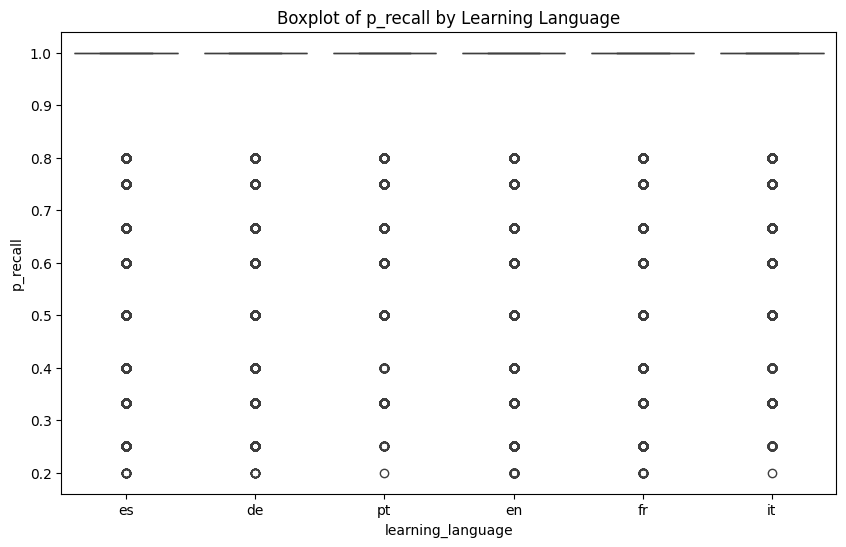

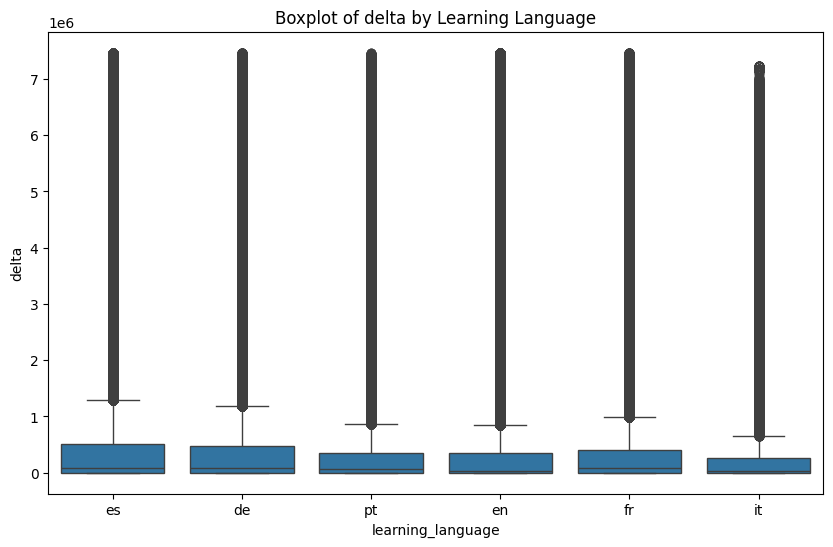

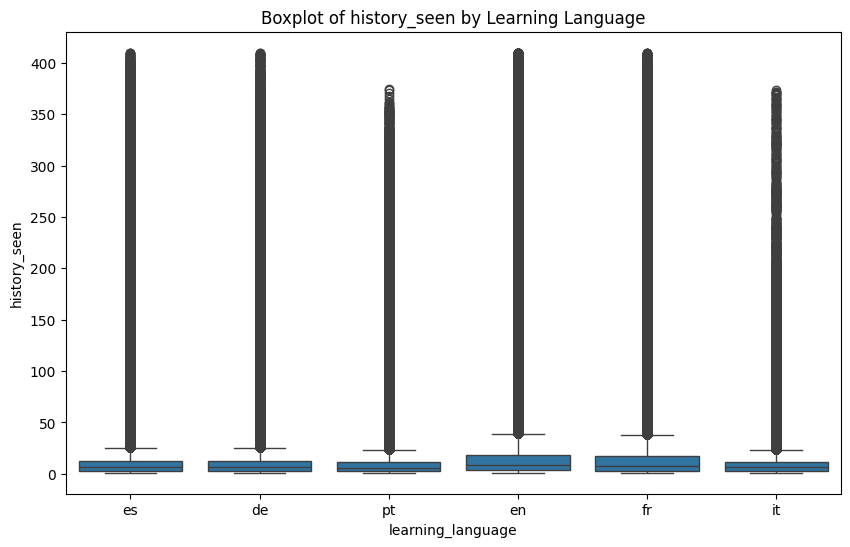

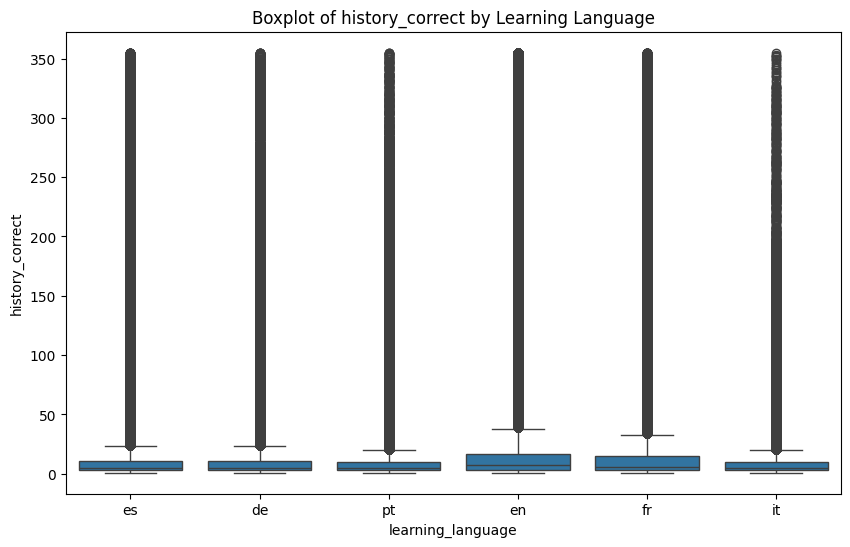

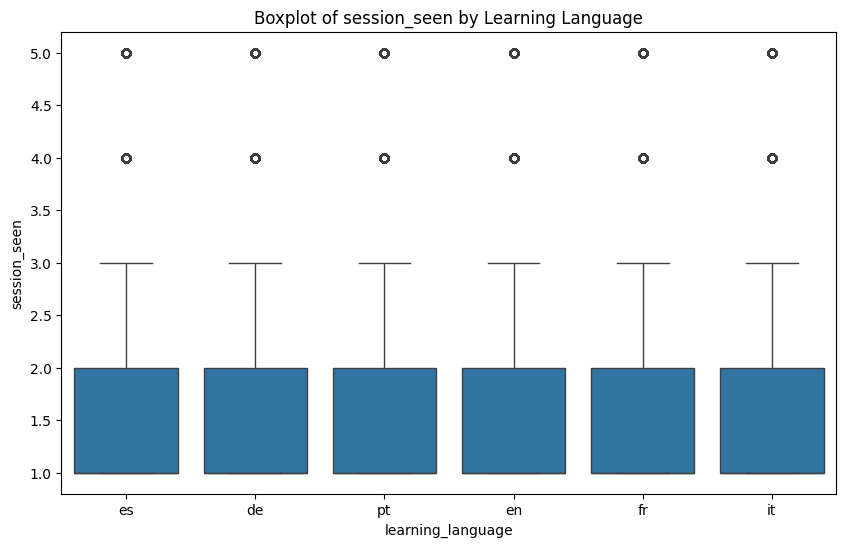

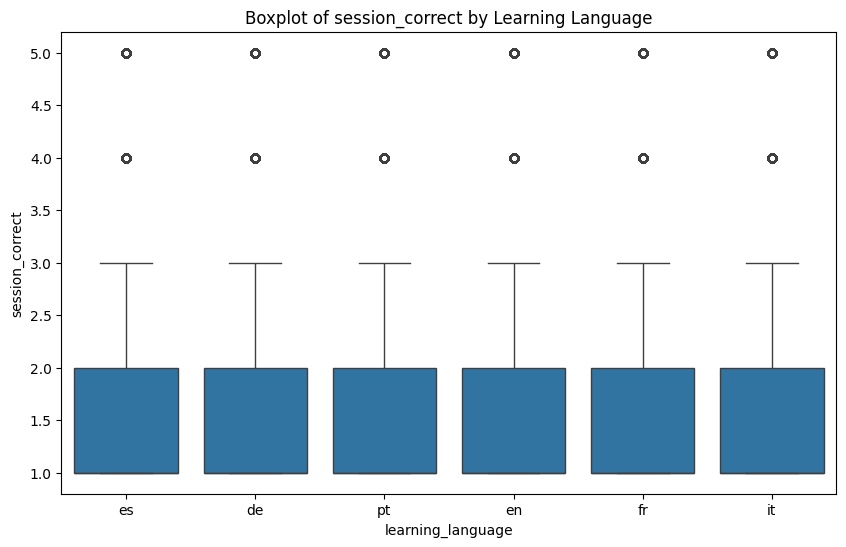

In [296]:
# Boxplots one by one
for y in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="learning_language", y=y, data=df)
    plt.title(f'Boxplot of {y} by Learning Language')
    plt.show()


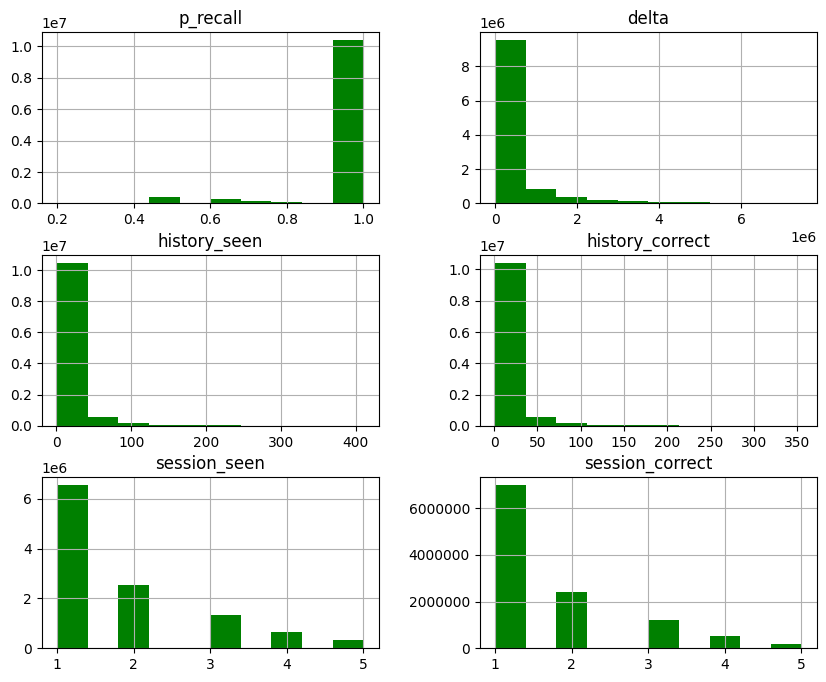

In [282]:
# Histograms
df[features].hist(figsize=(10,8), color='green')
plt.ticklabel_format(style = 'plain')

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

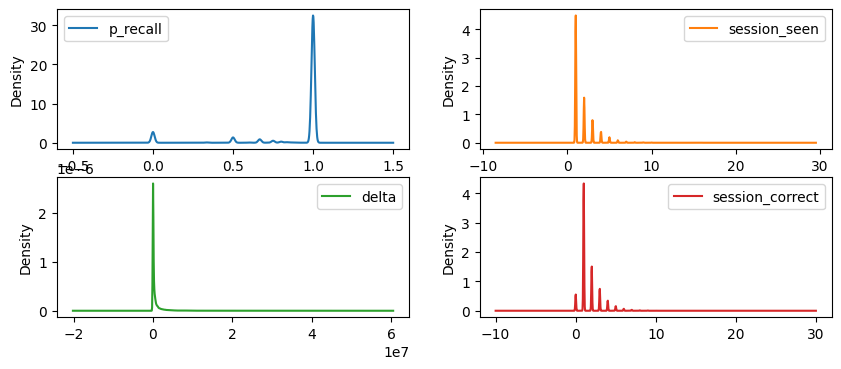

In [143]:
df[features].plot(kind='density',subplots=True,layout=(2,2),
                  sharex=False,figsize=(10,4))
plt.show()

In [ ]:
# Relationship -> delta with things 

plt.scatter(df['delta'], df['history_correct'])


# Language with things
#  

# 
# f, axes = plt.subplots(4, 4, figsize=[15, 15])
# plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
# for n, col in enumerate(dataset.columns[0:16]):
#     sns.regplot(x=col, y="imdb_score", data=dataset, ax=axes[n // 4, n % 4])

# Divide 
# for cat in categories:
#     dataset[cat] = dataset.genres.apply(lambda s: int(cat in s))
# dataset.head()


    # plt.scatter(df['Total day minutes'], df['Total night minutes'])
    # corr_matrix = df[numerical].corr()
    # sns.heatmap(corr_matrix)
    
    # sns.catplot(x='Churn', y='Total day minutes',col='Customer service calls',
    #         data=df[df['Customer service calls'] < 8], kind="box",
    #         col_wrap=4, height=3,aspect=.8)